# Missing Values and Split Apply Combine

This lesson focuses on reviewing our basics with pandas and extending them to more advanced munging and cleaning.  Specifically, we will discuss how to load data files, work with missing values, use split-apply-combine, use string methods, and work with string and datetime objects.  By the end of this lesson you should feel confident doing basic exploratory data analysis using `pandas`. 

**OBJECTIVES**

- Read local files in as `DataFrame` objects
- Drop missing values
- Replace missing values
- Impute missing values
- Use `.groupby` and split-apply-combine
- Explore basic plotting from a `DataFrame`


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Missing Values

Missing values are a common problem in data, whether this is because they are truly missing or there is confusion between the data encoding and the methods you read the data in using.

In [2]:
ufo_url = 'https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa25/refs/heads/main/data/ufo.csv'

In [3]:
#create ufo dataframe
ufo = pd.read_csv(ufo_url)
ufo.head()

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

In [4]:
# examine ufo info
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80492 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
 4   Time             80543 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [6]:
# one-liner to count missing values
ufo.isna().sum()

City                  51
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

In [10]:
# drop missing values
ufo.dropna(subset = 'City')

City Colors Reported Shape Reported State  \
0                    Ithaca             NaN       TRIANGLE    NY   
1               Willingboro             NaN          OTHER    NJ   
2                   Holyoke             NaN           OVAL    CO   
3                   Abilene             NaN           DISK    KS   
4      New York Worlds Fair             NaN          LIGHT    NY   
...                     ...             ...            ...   ...   
80538                Neligh             NaN         CIRCLE    NE   
80539          Uhrichsville             NaN          LIGHT    OH   
80540                Tucson        RED BLUE            NaN    AZ   
80541           Orland park             RED          LIGHT    IL   
80542              Loughman             NaN          LIGHT    FL   

                  Time  
0       6/1/1930 22:00  
1      6/30/1930 20:00  
2      2/15/1931 14:00  
3       6/1/1931 13:00  
4      4/18/1933 19:00  
...                ...  
80538   9/4/2014 23:20  
80539    9/5/2014 1:14  
80540    9/5/2014 2:40  
80541    9/5/2014 3:43  
80542    9/5/2014 5:30  

[80492 rows x 5 columns]

In [9]:
# still there?
ufo_nona = ufo.dropna( )

In [11]:
# fill missing values
ufo.fillna('missing')

City Colors Reported Shape Reported State  \
0                    Ithaca         missing       TRIANGLE    NY   
1               Willingboro         missing          OTHER    NJ   
2                   Holyoke         missing           OVAL    CO   
3                   Abilene         missing           DISK    KS   
4      New York Worlds Fair         missing          LIGHT    NY   
...                     ...             ...            ...   ...   
80538                Neligh         missing         CIRCLE    NE   
80539          Uhrichsville         missing          LIGHT    OH   
80540                Tucson        RED BLUE        missing    AZ   
80541           Orland park             RED          LIGHT    IL   
80542              Loughman         missing          LIGHT    FL   

                  Time  
0       6/1/1930 22:00  
1      6/30/1930 20:00  
2      2/15/1931 14:00  
3       6/1/1931 13:00  
4      4/18/1933 19:00  
...                ...  
80538   9/4/2014 23:20  
80539    9/5/2014 1:14  
80540    9/5/2014 2:40  
80541    9/5/2014 3:43  
80542    9/5/2014 5:30  

[80543 rows x 5 columns]

In [12]:
# most common values as a dictionary
ufo.mode()

City Colors Reported Shape Reported State            Time
0  Seattle          ORANGE          LIGHT    CA  7/4/2014 22:00

In [19]:
ufo.mode().iloc[0].to_dict()

{'City': 'Seattle',
 'Colors Reported': 'ORANGE',
 'Shape Reported': 'LIGHT',
 'State': 'CA',
 'Time': '7/4/2014 22:00'}

In [15]:
# replace missing values with most common value
ufo.fillna(ufo.mode().iloc[0].to_dict())

City Colors Reported Shape Reported State  \
0                    Ithaca          ORANGE       TRIANGLE    NY   
1               Willingboro          ORANGE          OTHER    NJ   
2                   Holyoke          ORANGE           OVAL    CO   
3                   Abilene          ORANGE           DISK    KS   
4      New York Worlds Fair          ORANGE          LIGHT    NY   
...                     ...             ...            ...   ...   
80538                Neligh          ORANGE         CIRCLE    NE   
80539          Uhrichsville          ORANGE          LIGHT    OH   
80540                Tucson        RED BLUE          LIGHT    AZ   
80541           Orland park             RED          LIGHT    IL   
80542              Loughman          ORANGE          LIGHT    FL   

                  Time  
0       6/1/1930 22:00  
1      6/30/1930 20:00  
2      2/15/1931 14:00  
3       6/1/1931 13:00  
4      4/18/1933 19:00  
...                ...  
80538   9/4/2014 23:20  
80539    9/5/2014 1:14  
80540    9/5/2014 2:40  
80541    9/5/2014 3:43  
80542    9/5/2014 5:30  

[80543 rows x 5 columns]

#### Problem

1. Read in the dataset `churn_missing.csv` from our repo as a `DataFrame` using the url below, assign to a variable `churn_df`

In [20]:
churn_url = 'https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa25/refs/heads/main/data/churn_missing.csv'
churn_df = pd.read_csv(churn_url)
churn_df.head(2)

state  account_length  area_code intl_plan vmail_plan  vmail_message  \
0    KS             128        415        no        yes           25.0   
1    OH             107        415        no        yes           26.0   

   day_mins  day_calls  day_charge  eve_mins  eve_calls  eve_charge  \
0     265.1        110       45.07     197.4         99       16.78   
1     161.6        123       27.47     195.5        103       16.62   

   night_mins  night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0       244.7           91         11.01       10.0           3          2.7   
1       254.4          103         11.45       13.7           3          3.7   

   custserv_calls  churn  
0               1  False  
1               1  False

In [23]:
churn_df.agg({'account_length': 'mean', 'area_code': 'median'})

account_length    101.064806
area_code         415.000000
dtype: float64

2. Are there any missing values?  What columns are they in and how many are there?

In [26]:
churn_df.shape[0]

3333

In [28]:
churn_df[['vmail_plan', 'vmail_message']]

vmail_plan  vmail_message
0           yes           25.0
1           yes           26.0
2            no            0.0
3            no            0.0
4            no            0.0
...         ...            ...
3328        yes           36.0
3329         no            0.0
3330         no            0.0
3331         no            0.0
3332        yes           25.0

[3333 rows x 2 columns]

In [27]:
churn_df.isna().sum()/churn_df.shape[0]

state             0.000000
account_length    0.000000
area_code         0.000000
intl_plan         0.000000
vmail_plan        0.120012
vmail_message     0.120012
day_mins          0.000000
day_calls         0.000000
day_charge        0.000000
eve_mins          0.000000
eve_calls         0.000000
eve_charge        0.000000
night_mins        0.000000
night_calls       0.000000
night_charge      0.000000
intl_mins         0.000000
intl_calls        0.000000
intl_charge       0.000000
custserv_calls    0.000000
churn             0.000000
dtype: float64

3. What do you think we should do about these?  Drop, replace, impute?

In [29]:
churn_df.fillna({'vmail_plan': 'no', 
                 'vmail_message': churn_df['vmail_message'].mean()})

state  account_length  area_code intl_plan vmail_plan  vmail_message  \
0       KS             128        415        no        yes           25.0   
1       OH             107        415        no        yes           26.0   
2       NJ             137        415        no         no            0.0   
3       OH              84        408       yes         no            0.0   
4       OK              75        415       yes         no            0.0   
...    ...             ...        ...       ...        ...            ...   
3328    AZ             192        415        no        yes           36.0   
3329    WV              68        415        no         no            0.0   
3330    RI              28        510        no         no            0.0   
3331    CT             184        510       yes         no            0.0   
3332    TN              74        415        no        yes           25.0   

      day_mins  day_calls  day_charge  eve_mins  eve_calls  eve_charge  \
0        265.1        110       45.07     197.4         99       16.78   
1        161.6        123       27.47     195.5        103       16.62   
2        243.4        114       41.38     121.2        110       10.30   
3        299.4         71       50.90      61.9         88        5.26   
4        166.7        113       28.34     148.3        122       12.61   
...        ...        ...         ...       ...        ...         ...   
3328     156.2         77       26.55     215.5        126       18.32   
3329     231.1         57       39.29     153.4         55       13.04   
3330     180.8        109       30.74     288.8         58       24.55   
3331     213.8        105       36.35     159.6         84       13.57   
3332     234.4        113       39.85     265.9         82       22.60   

      night_mins  night_calls  night_charge  intl_mins  intl_calls  \
0          244.7           91         11.01       10.0           3   
1          254.4          103         11.45       13.7           3   
2          162.6          104          7.32       12.2           5   
3          196.9           89          8.86        6.6           7   
4          186.9          121          8.41       10.1           3   
...          ...          ...           ...        ...         ...   
3328       279.1           83         12.56        9.9           6   
3329       191.3          123          8.61        9.6           4   
3330       191.9           91          8.64       14.1           6   
3331       139.2          137          6.26        5.0          10   
3332       241.4           77         10.86       13.7           4   

      intl_charge  custserv_calls  churn  
0            2.70               1  False  
1            3.70               1  False  
2            3.29               0  False  
3            1.78               2  False  
4            2.73               3  False  
...           ...             ...    ...  
3328         2.67               2  False  
3329         2.59               3  False  
3330         3.81               2  False  
3331         1.35               2  False  
3332         3.70               0  False  

[3333 rows x 20 columns]

### `groupby`

Often, you are faced with a dataset that you are interested in summaries within groups based on a condition.  The simplest condition is that of a unique value in a single column.  Using `.groupby` you can split your data into unique groups and summarize the results.  

**NOTE**: After splitting you need to summarize!

![](https://www.oreilly.com/api/v2/epubs/9781783985128/files/graphics/5128OS_09_01.jpg)

In [30]:
# sample data
titanic = sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [35]:
# survival rate of each sex?
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [36]:
# survival rate of each class?
titanic.groupby('class')['survived'].mean()

/var/folders/8v/7bhy8yqn04b7rzqglb2s38200000gn/T/ipykernel_67944/3036205504.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')['survived'].mean()


class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [38]:
# each class and sex survival rate
titanic.groupby(['class', 'sex'])[['survived']].mean()

/var/folders/8v/7bhy8yqn04b7rzqglb2s38200000gn/T/ipykernel_67944/3320218811.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['class', 'sex'])[['survived']].mean()


survived
class  sex             
First  female  0.968085
       male    0.368852
Second female  0.921053
       male    0.157407
Third  female  0.500000
       male    0.135447

In [39]:
# working with multi-index -- changing form of results
titanic.groupby(['class', 'sex'], as_index = False)[['survived']].mean()

/var/folders/8v/7bhy8yqn04b7rzqglb2s38200000gn/T/ipykernel_67944/3906719161.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['class', 'sex'], as_index = False)[['survived']].mean()


class     sex  survived
0   First  female  0.968085
1   First    male  0.368852
2  Second  female  0.921053
3  Second    male  0.157407
4   Third  female  0.500000
5   Third    male  0.135447

In [40]:
# age less than 40 survival rate
titanic['age'] < 40

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: age, Length: 891, dtype: bool

In [41]:
less_than_40 = titanic['age'] < 40
titanic.groupby(less_than_40)['survived'].mean()

age
False    0.332353
True     0.415608
Name: survived, dtype: float64

#### Problems

In [42]:
tips = sns.load_dataset('tips')

In [43]:
tips.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

1. Average tip for smokers vs. non-smokers.

In [44]:
tips.groupby('smoker')['tip'].mean()

/var/folders/8v/7bhy8yqn04b7rzqglb2s38200000gn/T/ipykernel_67944/2919508398.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('smoker')['tip'].mean()


smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

2. Average bill by day and time.

In [45]:
tips.groupby(['day', 'time'])['total_bill'].mean()

/var/folders/8v/7bhy8yqn04b7rzqglb2s38200000gn/T/ipykernel_67944/1203280366.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['day', 'time'])['total_bill'].mean()


day   time  
Thur  Lunch     17.664754
      Dinner    18.780000
Fri   Lunch     12.845714
      Dinner    19.663333
Sat   Lunch           NaN
      Dinner    20.441379
Sun   Lunch           NaN
      Dinner    21.410000
Name: total_bill, dtype: float64

3. What is another question `groupby` can help us answer here?

In [46]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips.groupby('sex')['tip_pct'].mean()

/var/folders/8v/7bhy8yqn04b7rzqglb2s38200000gn/T/ipykernel_67944/3543391185.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['tip_pct'].mean()


sex
Male      0.157651
Female    0.166491
Name: tip_pct, dtype: float64

### Plotting from a `DataFrame`

Next class we will introduce two plotting libraries -- `matplotlib` and `seaborn`.  It turns out that a `DataFrame` also inherits a good bit of `matplotlib` functionality, and plots can be created directly from a `DataFrame`.

In [47]:
url = 'https://raw.githubusercontent.com/evorition/astsadata/refs/heads/main/astsadata/data/UnempRate.csv'

In [48]:
unemp = pd.read_csv(url)

In [49]:
unemp.head()

index  value
0  1948 Jan    4.0
1  1948 Feb    4.7
2  1948 Mar    4.5
3  1948 Apr    4.0
4  1948 May    3.4

<Axes: >

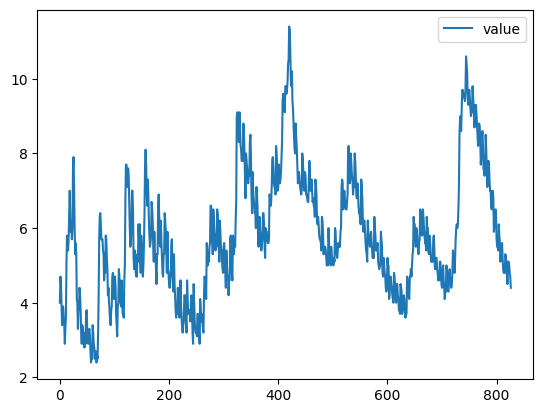

In [50]:
#default plot is line
unemp.plot()

In [51]:
unemp.head()

index  value
0  1948 Jan    4.0
1  1948 Feb    4.7
2  1948 Mar    4.5
3  1948 Apr    4.0
4  1948 May    3.4

In [52]:
unemp = pd.read_csv(url, index_col = 0)
unemp.head()

value
index          
1948 Jan    4.0
1948 Feb    4.7
1948 Mar    4.5
1948 Apr    4.0
1948 May    3.4

In [53]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 1948 Jan to 2016 Nov
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   827 non-null    float64
dtypes: float64(1)
memory usage: 12.9+ KB


<Axes: xlabel='index'>

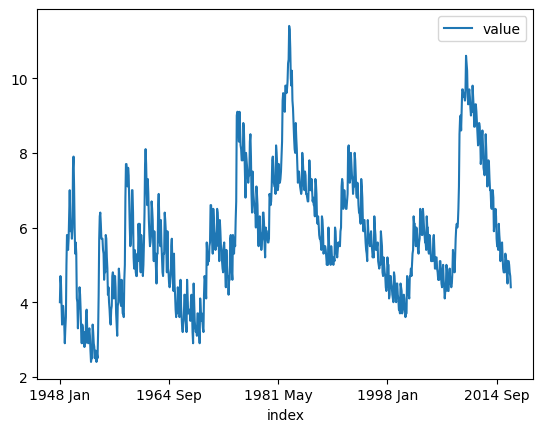

In [54]:
unemp.plot()

array([[<Axes: title={'center': 'value'}>]], dtype=object)

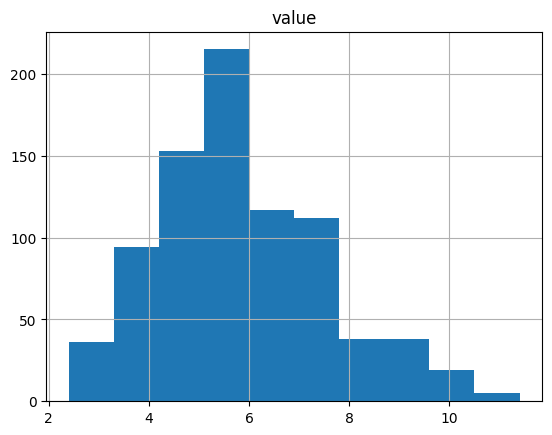

In [55]:
unemp.hist()

<Axes: >

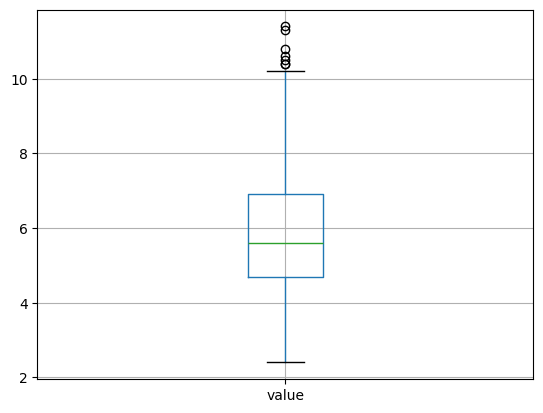

In [56]:
unemp.boxplot()

In [ ]:
#create a new column of shifted measurements
unemp['shifted'] = unemp.shift()

In [ ]:
unemp.plot()

In [ ]:
unemp.plot(x = 'value', y = 'shifted', kind = 'scatter')

In [ ]:
unemp.plot(x = 'value', y = 'shifted', kind = 'scatter', title = 'Unemployment Data', grid = True);

More with `pandas` and plotting [here](https://pandas.pydata.org/docs/user_guide/visualization.html).

#### `datetime`

A special type of data for pandas are entities that can be considered as dates.  We can create a special datatype for these using `pd.to_datetime`, and access the functions of the `datetime` module as a result.

In [ ]:
#ufo date column


In [ ]:
#make it a datetime


In [ ]:
#assign as time column


In [ ]:
#investigate datatypes


In [ ]:
#set as index


In [ ]:
#sort the values


In [ ]:
#groupby month and average


### Data Resources

- NYU has a number of resources for acquiring data with applications to economics and finance [here](https://guides.nyu.edu/finance).


**See you Thursday!**

